# Homework 9 Question 2:  Fertilizer influence model.
A series of experiments is conducted to determine the effect
of a particular fertilizer on wheat crop yield. Here are the results: Such situations typically involve


fertilizer rate (x) | crop yield (y)
--- | --- 
−5 | 127
−3 | 151
−1 | 379
1 | 421
3 | 460
5 | 426

some sort of “diminishing returns”. So there is a limit to how much the fertilizer can boost the yield.
A popular model for this relationship is the following:
$$y = k_1 + k_2 exp(k_3x)$$
Use nonlinear least squares to determine the values of ($k_1$, $k_2$, $k_3$) that provide the best fit to the data.
We are expecting coefficients in the neighborhood of (500, −200, −1).
To display your result, produce a plot of the original data points and the best-fit curve.

## Problem Data

In [1]:
x = [-5 -3 -1 1 3 5]
y = [127 151 379 421 460 426];

## Problem Model

In [2]:
using JuMP, Ipopt
n = 6
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, k[1:3])

@NLexpression(m, y_pred[i=1:n], k[1] + k[2]*e^(k[3]*x[i]))
@NLobjective(m, Min, (sum((y[i] - y_pred[i])^2 for i in 1:n)))
                
setvalue(k, [500; -200; -1])

solve(m)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



:Optimal

In [3]:
println("Optimal K: ", getvalue(k))
println("Error: ", getobjectivevalue(m))
println("Predictions: ", getvalue(y_pred))
println("Original: ", y)

Optimal K: [523.306,-156.948,-0.199665]
Error: 13390.093119479578
Predictions: [97.392,237.616,331.673,394.764,437.084,465.471]
Original: [127 151 379 421 460 426]


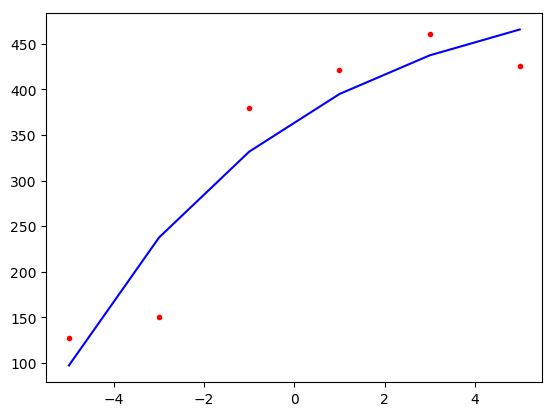

In [20]:
using PyPlot
Y = getvalue(y_pred)
plot(x,y,".r", label="true position")
plot(x',Y,"b-", label="Modelled");